In [1]:
# Get parent directory and add to sys.path
import os; import sys
import numpy as np
parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

In [2]:
# MPC import
from LinearMPC_deliverable_5_1.MPCVelControl import MPCVelControl

from src.rocket import Rocket
from src.vel_rocket_vis import RocketVis, plot_static_states_inputs

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir, "rocket.yaml")

In [3]:
Ts = 0.05
sim_time = 20
H = 5.0
x0 = np.array([0, 0, 0, 0, 0, 0, 5, 5, 10, 0, 0, 1])  # initial state
x_target = np.zeros((12,))

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
mpc = MPCVelControl().new_controller(rocket, Ts, H)

# Static mass change and zero fuel rate
rocket.mass = 2.0
rocket.fuel_rate = 0.1
t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, ref = rocket.simulate_control(mpc, sim_time, H, x0, x_target=x_target, method='nonlinear')

vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0
vis.animate(t_cl[:-1], x_cl[:,:-1], u_cl, Ref=ref[:,:-1], T_ol=t_ol[...,:-1], X_ol=x_ol, U_ol=u_ol); 


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

delta2_s (trim) = 0.0
du bounds = -0.2617993877991494 0.2617993877991494
=> abs bounds = -0.2617993877991494 0.2617993877991494
['A', 'H', 'b']
['A', 'H', 'b']
Simulating time 0.00: 

/opt/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


u_x: [0.26179939]
u_y: [-0.26179939]
vz: 10.0 dhat: 0.0 Pavg: 39.9999999731086
u_z: [39.99999997]
u_roll: [0.]
Fuel left: 1.00 kg, 
Simulating time 0.05: u_x: [0.26179939]
u_y: [-0.2555138]
vz: 9.78506398263138 dhat: -0.03763203435450535 Pavg: 40.000028126504105
u_z: [40.00002813]
u_roll: [-3.40077254e-05]
Fuel left: 1.00 kg, 
Simulating time 0.10: u_x: [0.04072846]
u_y: [-0.06390199]
vz: 9.574295297743898 dhat: -0.08142910200351139 Pavg: 40.00002208598923
u_z: [40.00002209]
u_roll: [-0.02109749]
Fuel left: 0.99 kg, 
Simulating time 0.15: u_x: [-0.12456284]
u_y: [0.1062229]
vz: 9.378785233931165 dhat: -0.09653064090284147 Pavg: 40.00002338326354
u_z: [40.00002338]
u_roll: [-0.08691518]
Fuel left: 0.99 kg, 
Simulating time 0.20: u_x: [-0.24565639]
u_y: [-0.18939921]
vz: 9.166507985499548 dhat: -0.13346622808600372 Pavg: 40.00002808986522
u_z: [40.00002809]
u_roll: [-0.1852947]
Fuel left: 0.99 kg, 
Simulating time 0.25: u_x: [0.23729486]
u_y: [-0.08138377]
vz: 8.946750855664513 dhat: -0.

AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=399, step=2), IntSlider(value=0…

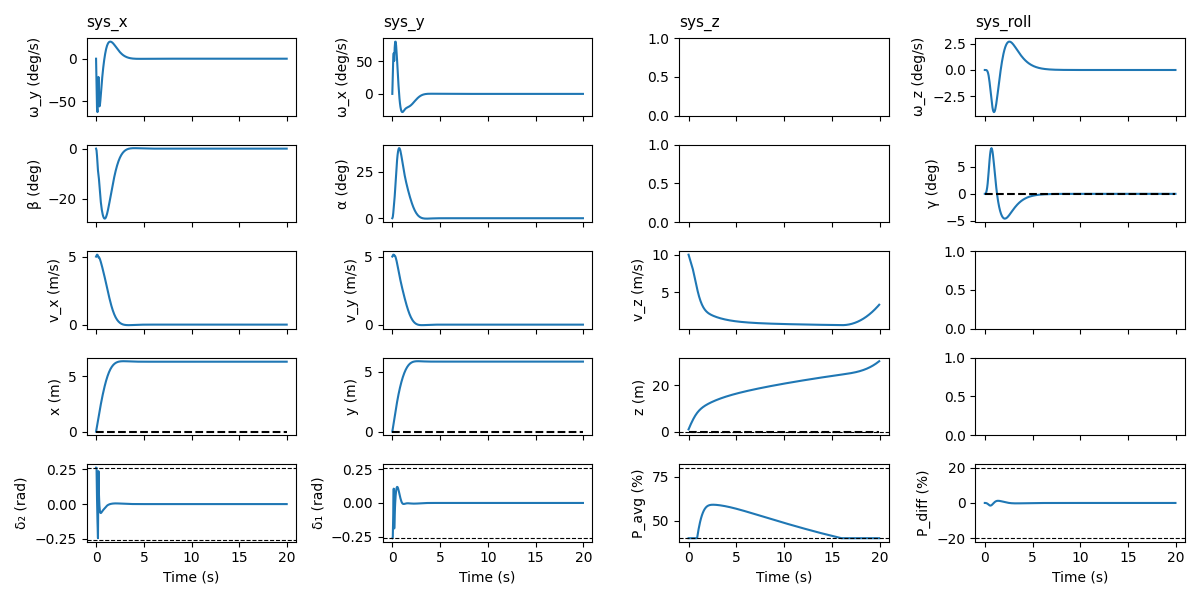

In [4]:
plot_static_states_inputs(t_cl[:-1], x_cl[:,:-1], u_cl, ref[:,:-1])